In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px
import pandas as pd
import geojsonio
import folium
import shapely
import altair as alt

In [2]:
data = pd.read_csv('C:/Users/gianl/Capstone/Mangiapane_Gianluca_PythonPredictor/raw_data/PythonSightings.csv')
data.head()

objectid                              reporter        RecOwner  \
0     97627    Skip Snow Everglades National Park  General Public   
1    145991    Skip Snow Everglades National Park  General Public   
2    414849    Skip Snow Everglades National Park  General Public   
3    446320  Michael Renda The Nature Conservancy  General Public   
4    462630       Jeffrey Carter Rookery Bay NERR  General Public   

                          SciName         ComName    Nativity OccStatus  \
0  Python molurus ssp. bivittatus  Burmese python  Introduced  Detected   
1  Python molurus ssp. bivittatus  Burmese python  Introduced  Detected   
2  Python molurus ssp. bivittatus  Burmese python  Introduced  Detected   
3  Python molurus ssp. bivittatus  Burmese python  Introduced  Detected   
4  Python molurus ssp. bivittatus  Burmese python  Introduced  Detected   

     Status     ObsDate     DateEnt  ... TreatComm  \
0  Positive   5/20/2008   5/23/2008  ...       NaN   
1  Positive   6/24/2008   6/30/2008  ...       NaN   
2  Positive   12/1/2008   12/3/2008  ...       NaN   
3  Positive  10/15/2008    3/7/2010  ...       NaN   
4  Positive  12/27/2008  12/30/2008  ...       NaN   

                                           Reference  \
0  "Skip Snow, National Park Service, personal co...   
1  "Skip Snow, National Park Service, personal co...   
2  "Skip Snow, National Park Service, personal co...   
3  "Michael Renda, The Nature Conservancy, person...   
4  "Jeffrey Carter, Rookery Bay National Estuarin...   

                                            Locality  \
0          "Everglades National Park, Paurotis Pond"   
1  "Key Largo, vicinity of Overseas Highway and F...   
2  "Spruce Creek, Kendrew Dr appx 130 m N of Bogg...   
3      "Jupiter, Sierra Square 9250 W Indiantown Rd"   
4  "Collier County, Hyw 951 appx 200m S of Shell ...   

                                            Comments ReviewDate Reviewer  \
0  "Matt Brien, University of Florida, stopped by...        NaN      NaN   
1  "At about 1:10 pm on Tuesday, 24 June 2008, th...        NaN      NaN   
2  "Observed on a forested private lot behind a r...        NaN      NaN   
3  "I did not observe this, but spoke to the anim...        NaN      NaN   
4                                                NaN        NaN      NaN   

            VerifyMthd  Verified    IDCred  ReviewComm  
0  Voucher Photographs  Verified  Verified         NaN  
1    Voucher Specimens  Verified  Verified         NaN  
2                  NaN  Verified  Credible         NaN  
3            Specimens  Verified  Verified         NaN  
4  Voucher Photographs  Verified  Verified         NaN  

[5 rows x 79 columns]

In [3]:
data.columns

Index(['objectid', 'reporter', 'RecOwner', 'SciName', 'ComName', 'Nativity',
       'OccStatus', 'Status', 'ObsDate', 'DateEnt', 'DateUp', 'Location',
       'Latitude', 'Longitude', 'Datum', 'Method', 'CoordAcc', 'DataType',
       'Centroid', 'Abundance', 'InfestAcre', 'GrossAcre', 'Percentcov',
       'Density', 'Quantity', 'QuantityU', 'APPXQuant', 'NumCollect',
       'Smallest', 'Largest', 'Incidence', 'Severity', 'Host', 'Host_Name',
       'HostPheno', 'HostDamage', 'ManageStat', 'PopStat', 'Habitat',
       'LocalOwner', 'Site', 'RecBasis', 'Museum', 'MuseumRec', 'Voucher',
       'ObsIDer', 'CollectTme', 'UUID', 'OrgSrcID', 'OrigName', 'RecSrcTyp',
       'Surveyor', 'DateAcc', 'VisitType', 'DataMthd', 'TrapType', 'NumTraps',
       'TargetName', 'TargetCnt', 'TargetRnge', 'Phenology', 'LifeStatus',
       'Sex', 'PID', 'WaterName', 'WaterType', 'Substrate', 'TreatArea',
       'PlantTreat', 'TreatComm', 'Reference', 'Locality', 'Comments',
       'ReviewDate', 'Reviewer', 'V

In [4]:
data = data.dropna(subset=['Latitude', 'Longitude'])

In [5]:
data["Coordinates"] = gpd.points_from_xy(data["Longitude"], data["Latitude"])

In [6]:
gdata = gpd.GeoDataFrame(data, geometry="Coordinates", crs="EPSG:4326")

In [7]:
pythons = gdata[['Coordinates']]

pythons.head()

Coordinates
0  POINT (-80.79981 25.28243)
1  POINT (-80.45266 25.08408)
2  POINT (-81.01820 29.09441)
3  POINT (-80.17971 26.93767)
4  POINT (-81.70120 26.02109)

In [8]:
pythons.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7217 entries, 0 to 7590
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Coordinates  7217 non-null   geometry
dtypes: geometry(1)
memory usage: 112.8 KB


In [34]:
zipcodes = gpd.read_file('raw_data/fl_florida_zip_codes_geo.min.json')
zipcodes = zipcodes.to_crs(epsg=4326)

zipcodes

STATEFP10 ZCTA5CE10  GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  \
0          12     32606  1232606        B5   G6350          S   44273265   
1          12     32609  1232609        B5   G6350          S  290843169   
2          12     32612  1232612        B5   G6350          S    2117657   
3          12     32234  1232234        B5   G6350          S  335454814   
4          12     32438  1232438        B5   G6350          S  162751694   
..        ...       ...      ...       ...     ...        ...        ...   
978        12     32129  1232129        B5   G6350          S   19276444   
979        12     32168  1232168        B5   G6350          S  424964754   
980        12     32738  1232738        B5   G6350          S   66976215   
981        12     32141  1232141        B5   G6350          S   60921307   
982        12     32459  1232459        B5   G6350          S  141718481   

     AWATER10   INTPTLAT10    INTPTLON10 PARTFLG10  \
0      253128  +29.6820042  -082.4440962         N   
1     6376578  +29.7689903  -082.2825337         N   
2      310044  +29.6431195  -082.3538453         N   
3     1292362  +30.2260009  -081.9835221         N   
4      964947  +30.5012874  -085.4240809         N   
..        ...          ...           ...       ...   
978    651408  +29.1369736  -081.0239569         N   
979   5791624  +28.9637734  -081.0294134         N   
980   8358124  +28.9052691  -081.1851759         N   
981   2134685  +28.9289532  -080.9191350         N   
982  40145065  +30.3606681  -086.1855320         N   

                                              geometry  
0    POLYGON ((-82.37990 29.67955, -82.38003 29.679...  
1    MULTIPOLYGON (((-82.35105 29.72611, -82.35094 ...  
2    MULTIPOLYGON (((-82.35040 29.64489, -82.35040 ...  
3    POLYGON ((-82.03100 30.14228, -82.03132 30.142...  
4    POLYGON ((-85.35526 30.53367, -85.35410 30.533...  
..                                                 ...  
978  POLYGON ((-80.99360 29.15030, -80.99358 29.149...  
979  POLYGON ((-81.02429 28.87645, -81.02489 28.876...  
980  POLYGON ((-81.21764 28.89041, -81.21749 28.890...  
981  POLYGON ((-80.91498 28.96535, -80.91481 28.965...  
982  POLYGON ((-86.32452 30.37290, -86.32450 30.373...  

[983 rows x 12 columns]

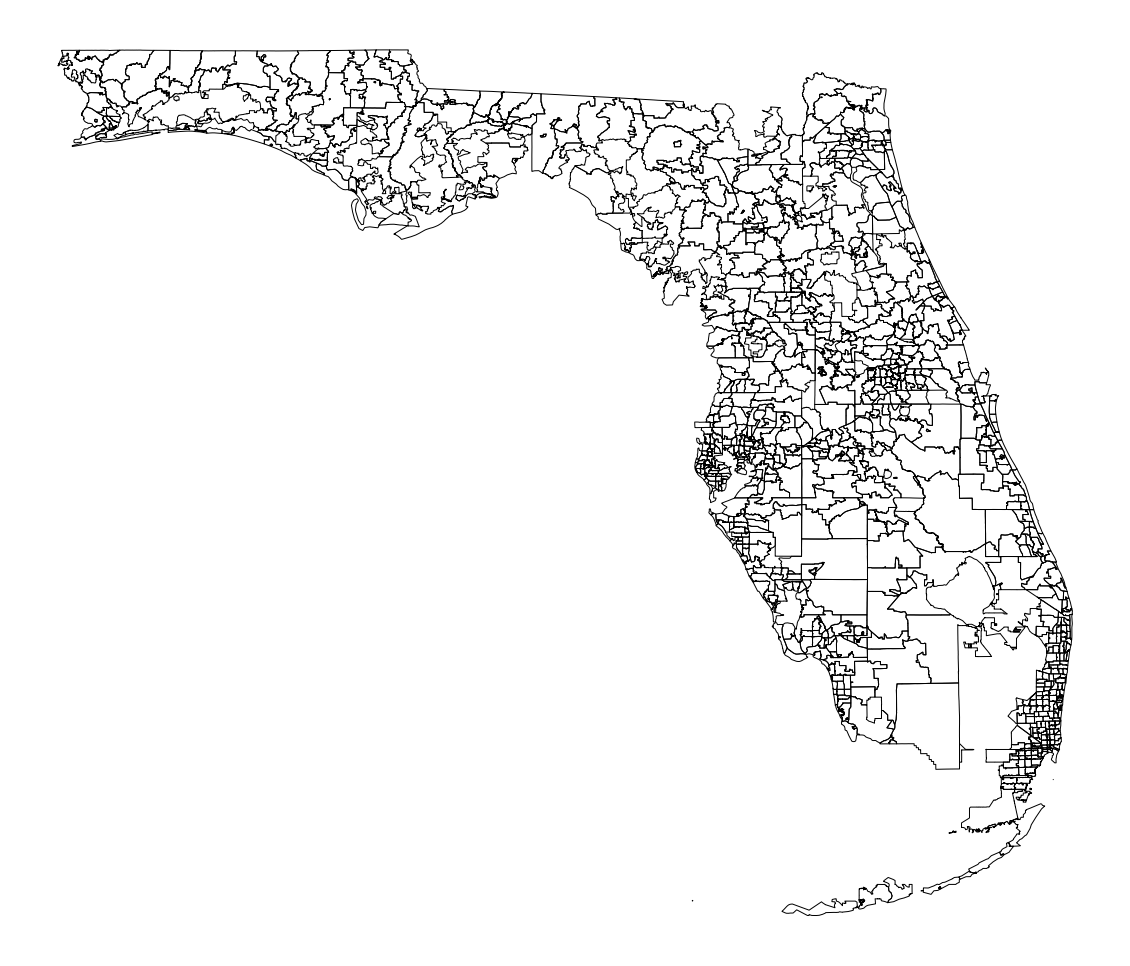

In [37]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = zipcodes.plot(ax=ax, facecolor='none', edgecolor='black')
ax.set_axis_off()
ax.set_aspect("equal")

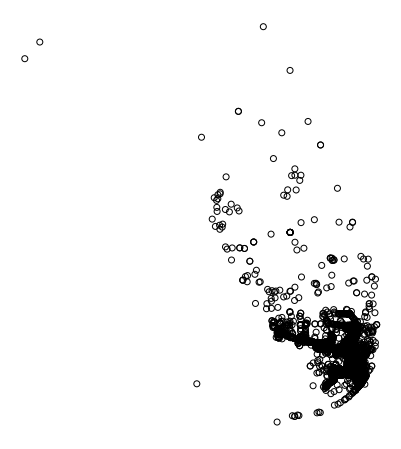

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = pythons.plot(ax=ax, facecolor='none', edgecolor='black')
ax.set_axis_off()
ax.set_aspect("equal")

In [1]:
counties = gpd.read_file('raw_data/geojson-fl-counties-fips.json')
counties = counties.to_crs(epsg=4326)

counties

NameError: name 'gpd' is not defined

In [39]:
pythons.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
joined = gpd.sjoin(pythons, zipcodes, predicate='within', how='left')

joined.head()

Coordinates  index_right STATEFP10 ZCTA5CE10  GEOID10  \
0  POINT (-80.79981 25.28243)          NaN       NaN       NaN      NaN   
1  POINT (-80.45266 25.08408)        327.0        12     33037  1233037   
2  POINT (-81.01820 29.09441)        381.0        12     32127  1232127   
3  POINT (-80.17971 26.93767)        172.0        12     33478  1233478   
4  POINT (-81.70120 26.02109)        138.0        12     34113  1234113   

  CLASSFP10 MTFCC10 FUNCSTAT10      ALAND10     AWATER10   INTPTLAT10  \
0       NaN     NaN        NaN          NaN          NaN          NaN   
1        B5   G6350          S   87599034.0  226325606.0  +25.2283222   
2        B5   G6350          S   41073595.0   14502120.0  +29.1062574   
3        B5   G6350          S  137758974.0    4100821.0  +26.9350207   
4        B5   G6350          S   72608520.0   16237588.0  +26.0436491   

     INTPTLON10 PARTFLG10  
0           NaN       NaN  
1  -080.3954506         N  
2  -080.9736036         N  
3  -080.2460705         N  
4  -081.7324237         N

In [42]:
len(joined)

7217

In [44]:
grouped = joined.groupby('ZCTA5CE10', as_index=False)

count = grouped['Coordinates'].count()

count

ZCTA5CE10  Coordinates
0       32127            2
1       32134            2
2       32164            1
3       32246            1
4       32428            1
..        ...          ...
186     34972            5
187     34974            5
188     34984            1
189     34990            1
190     34997            1

[191 rows x 2 columns]

In [45]:
count = count.rename(columns={"Coordinates": "Sightings"})

count.sort_values(by='Sightings', ascending=False)



ZCTA5CE10  Sightings
164     34141        945
32      33034        692
84      33194        461
80      33187        403
35      33037        147
..        ...        ...
112     33617          1
111     33614          1
110     33548          1
109     33498          1
190     34997          1

[191 rows x 2 columns]

In [47]:
reports = zipcodes.merge(count, on='ZCTA5CE10')

reports.head()

STATEFP10 ZCTA5CE10  GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  \
0        12     32612  1232612        B5   G6350          S    2117657   
1        12     33950  1233950        B5   G6350          S   58075439   
2        12     34120  1234120        B5   G6350          S  391380888   
3        12     34140  1234140        B5   G6350          S    3446848   
4        12     32164  1232164        B5   G6350          S   86384220   

   AWATER10   INTPTLAT10    INTPTLON10 PARTFLG10  \
0    310044  +29.6431195  -082.3538453         N   
1  20683856  +26.9029889  -082.0462443         N   
2  10296205  +26.3261008  -081.5700933         N   
3   1239527  +25.9251938  -081.6629165         N   
4    597671  +29.5198957  -081.2377551         N   

                                            geometry  Sightings  
0  MULTIPOLYGON (((-82.35040 29.64489, -82.35040 ...          2  
1  POLYGON ((-82.05021 26.84329, -82.05025 26.843...          1  
2  POLYGON ((-81.58839 26.23011, -81.58854 26.230...          4  
3  POLYGON ((-81.65627 25.93245, -81.65504 25.932...          1  
4  POLYGON ((-81.20722 29.41543, -81.20744 29.415...          1

In [50]:
# Convert median values to EPSG=4326
reports_4326 = reports.to_crs(epsg=4326)

# Plot the map
chart = (
    alt.Chart(reports_4326)
    .mark_geoshape(stroke="white")
    .encode(
        tooltip=["Sightings:Q", "ZCTA5CE10:N"],
        color=alt.Color("Sightings:Q", scale=alt.Scale(scheme='viridis'))
    ).properties(width=800, height=800)
)

chart

alt.Chart(...)

In [51]:
before2000 = data[data["ObsDate"] < '01/01/2000']

In [32]:
before2000.head()

Empty DataFrame
Columns: [objectid, reporter, RecOwner, SciName, ComName, Nativity, OccStatus, Status, ObsDate, DateEnt, DateUp, Location, Latitude, Longitude, Datum, Method, CoordAcc, DataType, Centroid, Abundance, InfestAcre, GrossAcre, Percentcov, Density, Quantity, QuantityU, APPXQuant, NumCollect, Smallest, Largest, Incidence, Severity, Host, Host_Name, HostPheno, HostDamage, ManageStat, PopStat, Habitat, LocalOwner, Site, RecBasis, Museum, MuseumRec, Voucher, ObsIDer, CollectTme, UUID, OrgSrcID, OrigName, RecSrcTyp, Surveyor, DateAcc, VisitType, DataMthd, TrapType, NumTraps, TargetName, TargetCnt, TargetRnge, Phenology, LifeStatus, Sex, PID, WaterName, WaterType, Substrate, TreatArea, PlantTreat, TreatComm, Reference, Locality, Comments, ReviewDate, Reviewer, VerifyMthd, Verified, IDCred, ReviewComm, Coordinates]
Index: []

[0 rows x 80 columns]